# BATATA CHIPS



1.   Examinando os dados – procurando inconsistências, dados ausentes no conjunto de dados, valores discrepantes, itens de categoria identificados corretamente, dados numéricos em todas as tabelas. Caso for encontrado alguma anomalia, fazer as alterações necessárias no conjunto de dados e salve-o. Ter dados limpos nos ajudará quando se trata de sua análise.

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import datetime

# Configurando o estilo dos gráficos com o Seaborn
sns.set_style('whitegrid')

# Importando os dados
df_purchase_behaviour = pd.read_csv('/content/drive/MyDrive/Projetos/batata_chips/QVI_purchase_behaviour.csv')
df_transaction_data = pd.read_csv('/content/drive/MyDrive/Projetos/batata_chips/QVI_transaction_data.csv')

# Visualizando as primeiras linhas dos dataframes
display(df_purchase_behaviour.head())
display(df_transaction_data.head())

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [2]:
# Mesclando as duas tabelas com um merge left join, usando a coluna "LYLTY_CARD_NBR" para mesclar as tablelas.
df = pd.merge(df_transaction_data, df_purchase_behaviour, on='LYLTY_CARD_NBR', how='left')
# Visualizando as primeiras linhas do dataframe mesclado
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [3]:
# Verificando a estrutura do conjunto de dados com "shape" que retorna uma tupla com as dimensões da tabela, para fazermos analises de linhas em brancos
print(f'Número de linhas: {df.shape[0]}')
print(f'Número de colunas: {df.shape[1]}')

Número de linhas: 264836
Número de colunas: 10


In [4]:
# Verificando se há valores nulos e ausentes
df.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

Verificamos com essa analise que não há inconsistência em nossos dados.

In [5]:
# Verificando os tipos de dados das colunas
df.dtypes

DATE                 object
STORE_NBR             int64
LYLTY_CARD_NBR        int64
TXN_ID                int64
PROD_NBR              int64
PROD_NAME            object
PROD_QTY              int64
TOT_SALES           float64
LIFESTAGE            object
PREMIUM_CUSTOMER     object
dtype: object

In [6]:
# Convertendo a coluna 'DATE' para o formato de data
df['DATE'] = pd.to_datetime(df['DATE'])

# Verificando os tipos de dados das colunas novamente
df.dtypes

DATE                datetime64[ns]
STORE_NBR                    int64
LYLTY_CARD_NBR               int64
TXN_ID                       int64
PROD_NBR                     int64
PROD_NAME                   object
PROD_QTY                     int64
TOT_SALES                  float64
LIFESTAGE                   object
PREMIUM_CUSTOMER            object
dtype: object

In [7]:
# Análise descritiva das colunas, com as colunas na vertical.
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
DATE,264836,2018-12-30 00:52:12.879215616,2018-07-01 00:00:00,2018-09-30 00:00:00,2018-12-30 00:00:00,2019-03-31 00:00:00,2019-06-30 00:00:00,NaN
STORE_NBR,264836.0,135.08011,1.0,70.0,130.0,203.0,272.0,76.78418
LYLTY_CARD_NBR,264836.0,135549.476404,1000.0,70021.0,130357.5,203094.25,2373711.0,80579.978022
TXN_ID,264836.0,135158.310815,1.0,67601.5,135137.5,202701.25,2415841.0,78133.026026
PROD_NBR,264836.0,56.583157,1.0,28.0,56.0,85.0,114.0,32.826638
PROD_QTY,264836.0,1.907309,1.0,2.0,2.0,2.0,200.0,0.643654
TOT_SALES,264836.0,7.3042,1.5,5.4,7.4,9.2,650.0,3.083226


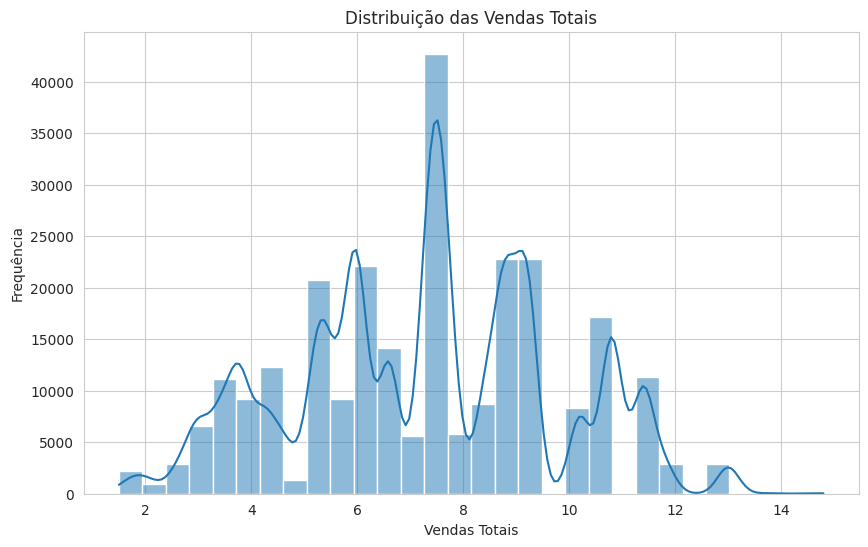

In [8]:
# Removendo outliers da coluna 'TOT_SALES'
Q1 = df['TOT_SALES'].quantile(0.25)
Q3 = df['TOT_SALES'].quantile(0.75)
IQR = Q3 - Q1

# Definindo os limites para os outliers
limit_inferior = Q1 - 1.5 * IQR
limit_superior = Q3 + 1.5 * IQR

# Criando um novo dataframe sem os outliers
df_sem_outliers = df[(df['TOT_SALES'] >= limit_inferior) & (df['TOT_SALES'] <= limit_superior)]

# Visualizando a distribuição das vendas totais
plt.figure(figsize=(10, 6))
sns.histplot(df_sem_outliers['TOT_SALES'], kde=True, bins=30)
plt.title('Distribuição das Vendas Totais')
plt.xlabel('Vendas Totais')
plt.ylabel('Frequência')
plt.show()



1.1   Filtrar os produtos que nem o nome “chip”.



In [9]:
# como fazer uma varredura para encontrar os nomes que quero
df = df[df['PROD_NAME'].str.contains('chip', case = False)]

In [10]:
# Guardando a coluna com o nomes filtrados
marcas = df["PROD_NAME"]

In [11]:
marcas.head(20)

0       Natural Chip        Compny SeaSalt175g
2       Smiths Crinkle Cut  Chips Chicken 170g
3       Smiths Chip Thinly  S/Cream&Onion 175g
6     Smiths Crinkle Chips Salt & Vinegar 330g
8      Doritos Corn Chip Mexican Jalapeno 150g
10    Smiths Crinkle Chips Salt & Vinegar 330g
14              Thins Chips Light&  Tangy 175g
18     Doritos Corn Chip Southern Chicken 150g
26       Smiths Chip Thinly  Cut Original 175g
33      Thins Chips         Originl saltd 175g
38              Thins Chips Light&  Tangy 175g
40      Natural ChipCo      Hony Soy Chckn175g
52            Thins Chips Seasonedchicken 175g
57     Doritos Corn Chip Mexican Jalapeno 150g
68           Doritos Corn Chips  Original 170g
73    Cobs Popd Swt/Chlli &Sr/Cream Chips 110g
75     Natural Chip Co     Tmato Hrb&Spce 175g
78     Doritos Corn Chip Mexican Jalapeno 150g
80     Smiths Crinkle Cut  Chips Original 170g
81              Cobs Popd Sea Salt  Chips 110g
Name: PROD_NAME, dtype: object

In [12]:
# Filtrando somente o nome das marcas
marcas_chip = []

for x in marcas:
  if 'Smiths' in x:
    marca = x[:6]
  elif 'Thins' in x:
    marca = x[:5]
  elif 'Doritos' in x:
    marca = x[:7]
  elif 'Cobs' in x:
    marca = x[:9]
  elif 'French' in x:
    marca = x[:12]
  elif 'Natural' in x:
    marca = x[:7]
  elif 'WW' in x:
    marca = x[:2]
  elif 'Tostitos' in x:
    marca = x[:8]
  else:
    marca = x[:20]

  marcas_chip.append(marca)


In [13]:
#Criando uma coluna nova com os nomes das marcas após realizar filtros
df['Marca'] = marcas_chip
df['Marca'].head(40)

<ipython-input-13-e5ebc112471d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Marca'] = marcas_chip


0           Natural
2            Smiths
3            Smiths
6            Smiths
8           Doritos
10           Smiths
14            Thins
18          Doritos
26           Smiths
33            Thins
38            Thins
40          Natural
52            Thins
57          Doritos
68          Doritos
73        Cobs Popd
75          Natural
78          Doritos
80           Smiths
81        Cobs Popd
82           Smiths
86     French Fries
88          Doritos
93          Doritos
94               WW
97            Thins
98        Cobs Popd
100       Cobs Popd
101          Smiths
102         Doritos
103         Doritos
107          Smiths
108       Cobs Popd
109         Doritos
111              WW
112              WW
119           Thins
121         Doritos
122              WW
123         Doritos
Name: Marca, dtype: object



1.2 Fazendo analises por marcar


In [14]:
#vamos agrupar valor total de vendas por marcar para verificarmos quais marcas estão no topo de vendas.
df.groupby("Marca")["TOT_SALES"].sum().sort_values(ascending=False)

Marca
Smiths          129237.8
Doritos         127597.3
Thins            88852.5
Cobs Popd        70569.8
Natural          34272.0
WW               26655.1
Tostitos         26474.8
French Fries      7929.0
Name: TOT_SALES, dtype: float64

In [15]:
top_marcas = df.groupby("Marca")["TOT_SALES"].sum().sort_values(ascending=False).head(5)

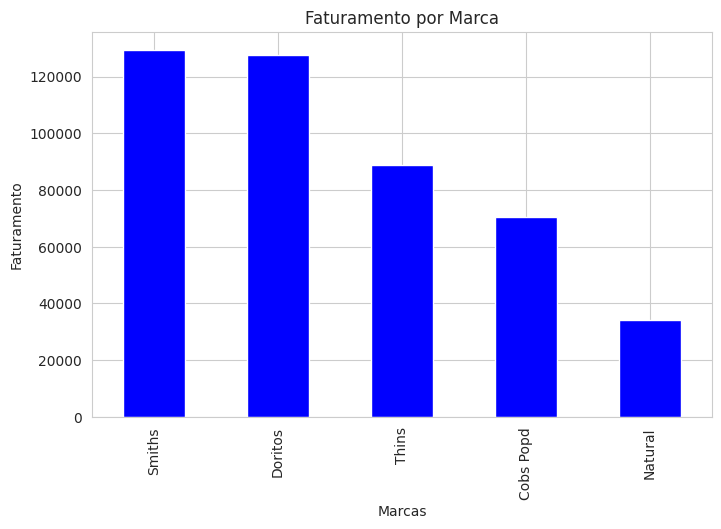

In [16]:
# Visualizando a distribuição das vendas por marcar
plt.figure(figsize=(8,5))
top_marcas.plot(kind= "bar", color = 'blue')
plt.xlabel("Marcas")
plt.ylabel("Faturamento")
plt.title("Faturamento por Marca")
plt.show()

In [17]:
#agora vamos pegar a marca Smiths para vermos os totais de vendas por produto
marca_Smiths = df[df['Marca']=='Smiths']
marca_Smiths.groupby('PROD_NAME')["TOT_SALES"].sum().sort_values(ascending=False)

PROD_NAME
Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Smiths Chip Thinly  Cut Original 175g        9135.0
Smiths Chip Thinly  S/Cream&Onion 175g       8313.0
Smiths Chip Thinly  CutSalt/Vinegr175g       8196.0
Smiths Crinkle Cut  Chips Chicken 170g       8183.8
Smiths Crinkle Cut  Chips Barbecue 170g      8125.8
Smiths Crinkle Cut  Chips Chs&Onion170g      8111.3
Smiths Crinkle Cut  Chips Original 170g      8001.1
Name: TOT_SALES, dtype: float64

In [18]:
vendas_Smiths = marca_Smiths.groupby('PROD_NAME')["TOT_SALES"].sum().sort_values(ascending=False)

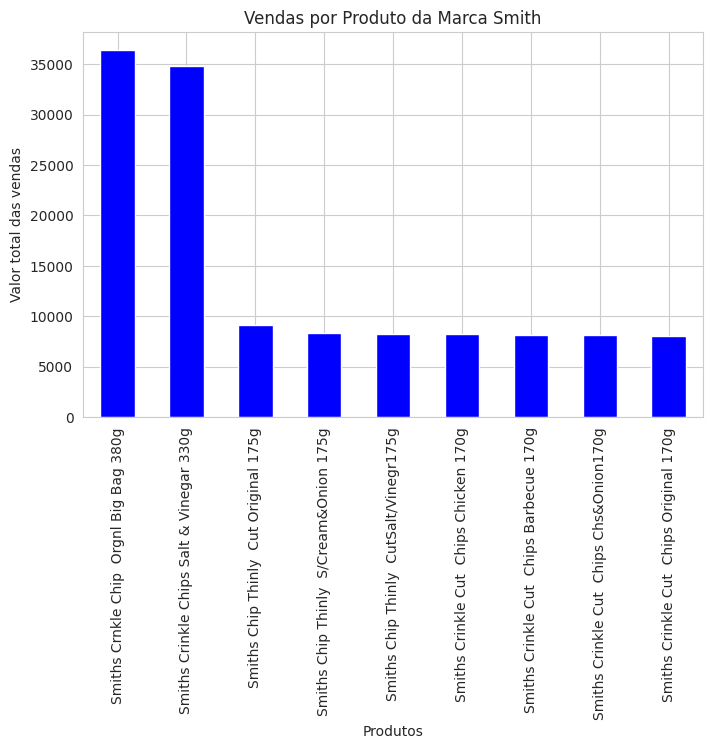

In [19]:
# Visualizando a distribuição das vendas por marcar
plt.figure(figsize=(8,5))
vendas_Smiths.plot(kind= "bar", color = 'blue')
plt.xlabel("Produtos")
plt.ylabel("Valor total das vendas")
plt.title("Vendas por Produto da Marca Smith")
plt.show()

In [20]:
#agora vamos pegar a marca Smiths para vermos os quantidade de vendas por produto
qtd_vendas_Smiths = marca_Smiths.groupby('PROD_NAME')["PROD_QTY"].sum().sort_values(ascending=False)
marca_Smiths.groupby('PROD_NAME')["PROD_QTY"].sum().sort_values(ascending=False)

PROD_NAME
Smiths Crnkle Chip  Orgnl Big Bag 380g      6164
Smiths Crinkle Chips Salt & Vinegar 330g    6106
Smiths Chip Thinly  Cut Original 175g       3045
Smiths Crinkle Cut  Chips Chicken 170g      2823
Smiths Crinkle Cut  Chips Barbecue 170g     2802
Smiths Crinkle Cut  Chips Chs&Onion170g     2797
Smiths Chip Thinly  S/Cream&Onion 175g      2771
Smiths Crinkle Cut  Chips Original 170g     2759
Smiths Chip Thinly  CutSalt/Vinegr175g      2732
Name: PROD_QTY, dtype: int64

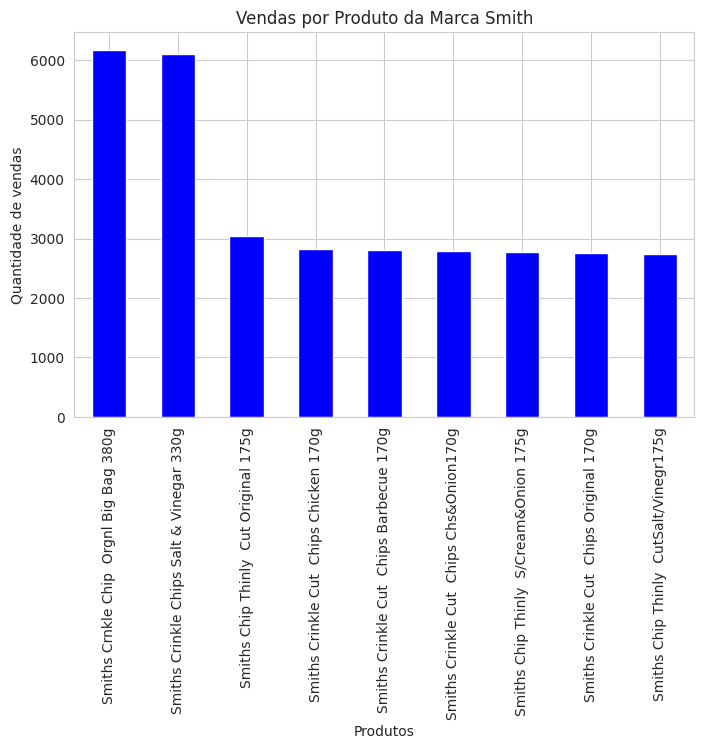

In [21]:
# Visualizando a distribuição das vendas por marcar
plt.figure(figsize=(8,5))
qtd_vendas_Smiths.plot(kind= "bar", color = 'blue')
plt.xlabel("Produtos")
plt.ylabel("Quantidade de vendas")
plt.title("Vendas por Produto da Marca Smith")
plt.show()

In [22]:
#agora vamos pegar a marca Doritos para vermos os totais de vendas por produto
marca_Doritos = df[df['Marca']=='Doritos']
vendas_Doritos = marca_Doritos.groupby('PROD_NAME')["TOT_SALES"].sum().sort_values(ascending=False)
marca_Doritos.groupby('PROD_NAME')["TOT_SALES"].sum().sort_values(ascending=False)

PROD_NAME
Doritos Corn Chips  Cheese Supreme 170g    27183.2
Doritos Corn Chips  Nacho Cheese 170g      26562.8
Doritos Corn Chips  Original 170g          26228.4
Doritos Corn Chip Mexican Jalapeno 150g    23887.5
Doritos Corn Chip Southern Chicken 150g    23735.4
Name: TOT_SALES, dtype: float64

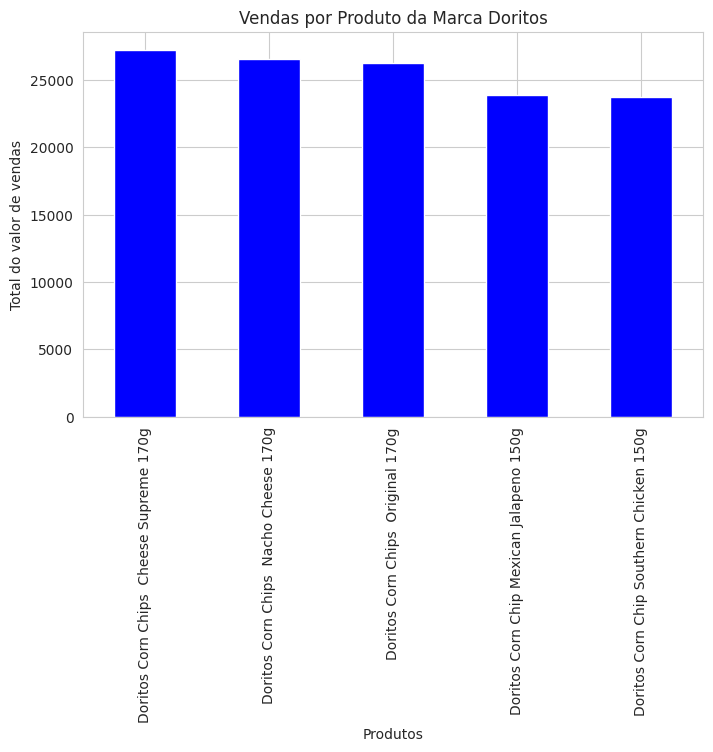

In [23]:
# Visualizando a distribuição das vendas por marcar
plt.figure(figsize=(8,5))
vendas_Doritos.plot(kind= "bar", color = 'blue')
plt.xlabel("Produtos")
plt.ylabel("Total do valor de vendas")
plt.title("Vendas por Produto da Marca Doritos")
plt.show()

In [24]:
#agora vamos pegar a marca Doritos para vermos os quantidade de vendas por produto
qtd_vendas_Doritos = marca_Doritos.groupby('PROD_NAME')["PROD_QTY"].sum().sort_values(ascending=False)
marca_Doritos.groupby('PROD_NAME')["PROD_QTY"].sum().sort_values(ascending=False)

PROD_NAME
Doritos Corn Chips  Cheese Supreme 170g    6180
Doritos Corn Chip Mexican Jalapeno 150g    6125
Doritos Corn Chip Southern Chicken 150g    6086
Doritos Corn Chips  Nacho Cheese 170g      6037
Doritos Corn Chips  Original 170g          5961
Name: PROD_QTY, dtype: int64

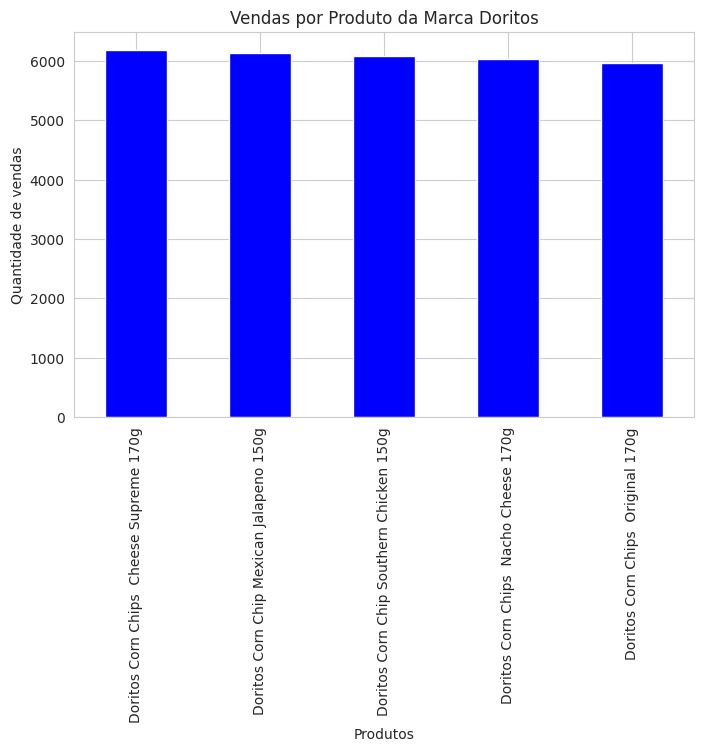

In [25]:
# Visualizando a distribuição das vendas por marcar
plt.figure(figsize=(8,5))
qtd_vendas_Doritos.plot(kind= "bar", color = 'blue')
plt.xlabel("Produtos")
plt.ylabel("Quantidade de vendas")
plt.title("Vendas por Produto da Marca Doritos")
plt.show()

In [26]:
#agora vamos pegar a marca Thins para vermos os totais de vendas por produto
marca_Thins = df[df['Marca']=='Thins']
vendas_Thins = marca_Thins.groupby('PROD_NAME')["TOT_SALES"].sum().sort_values(ascending=False)
marca_Thins.groupby('PROD_NAME')["TOT_SALES"].sum().sort_values(ascending=False)

PROD_NAME
Thins Potato Chips  Hot & Spicy 175g      20410.5
Thins Chips Light&  Tangy 175g            20113.5
Thins Chips Seasonedchicken 175g          19753.8
Thins Chips Salt &  Vinegar 175g          19575.6
Thins Chips         Originl saltd 175g     8999.1
Name: TOT_SALES, dtype: float64

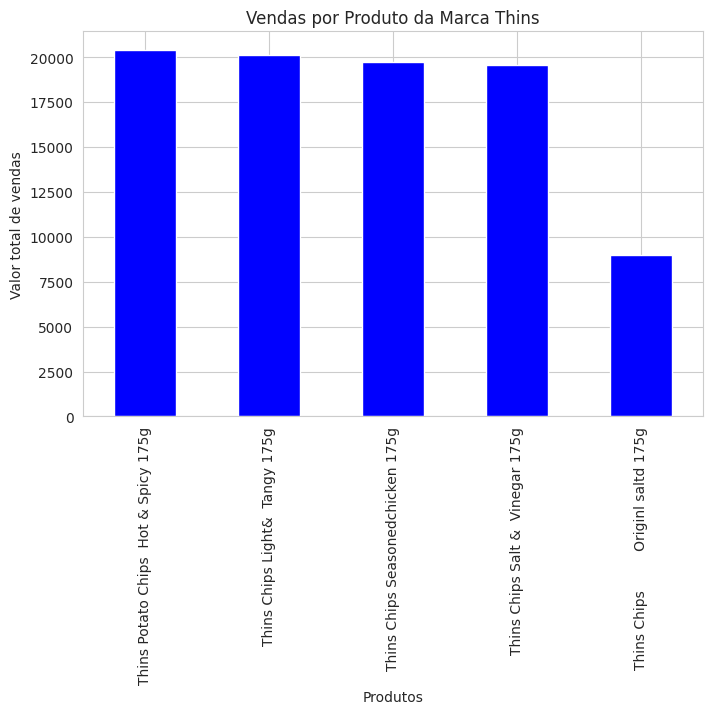

In [27]:
# Visualizando a distribuição das vendas por marcar
plt.figure(figsize=(8,5))
vendas_Thins.plot(kind= "bar", color = 'blue')
plt.xlabel("Produtos")
plt.ylabel("Valor total de vendas")
plt.title("Vendas por Produto da Marca Thins")
plt.show()

In [28]:
#agora vamos pegar a marca Thins para vermos os quantidade de vendas por produto
qtd_vendas_Thins = marca_Thins.groupby('PROD_NAME')["PROD_QTY"].sum().sort_values(ascending=False)
marca_Thins.groupby('PROD_NAME')["PROD_QTY"].sum().sort_values(ascending=False)

PROD_NAME
Thins Potato Chips  Hot & Spicy 175g      6185
Thins Chips Light&  Tangy 175g            6095
Thins Chips Seasonedchicken 175g          5986
Thins Chips Salt &  Vinegar 175g          5936
Thins Chips         Originl saltd 175g    2727
Name: PROD_QTY, dtype: int64

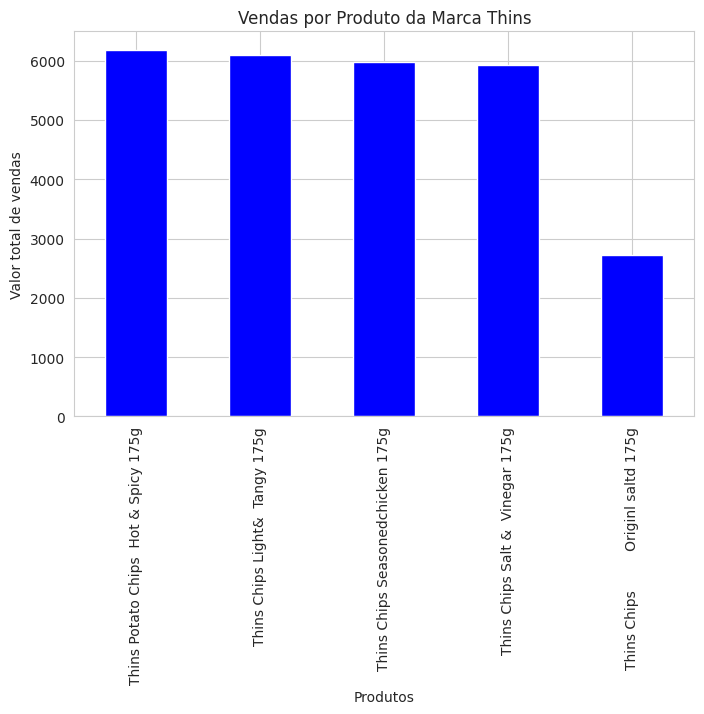

In [71]:
# Visualizando a distribuição das vendas por marcar
plt.figure(figsize=(8,5))
qtd_vendas_Thins.plot(kind= "bar", color = 'blue')
plt.xlabel("Produtos")
plt.ylabel("Valor total de vendas")
plt.title("Vendas por Produto da Marca Thins")
plt.show()

In [74]:
#agora vamos pegar a marca Cobs Popd para vermos os totais de vendas por produto
marca_Cobs_Popd = df[df['Marca']=='Cobs Popd']
vendas_Cobs = marca_Cobs_Popd.groupby('PROD_NAME')["TOT_SALES"].sum().sort_values(ascending=False)
marca_Cobs_Popd.groupby('PROD_NAME')["TOT_SALES"].sum().sort_values(ascending=False)

PROD_NAME
Cobs Popd Sea Salt  Chips 110g              23852.6
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    23772.8
Cobs Popd Sour Crm  &Chives Chips 110g      22944.4
Name: TOT_SALES, dtype: float64

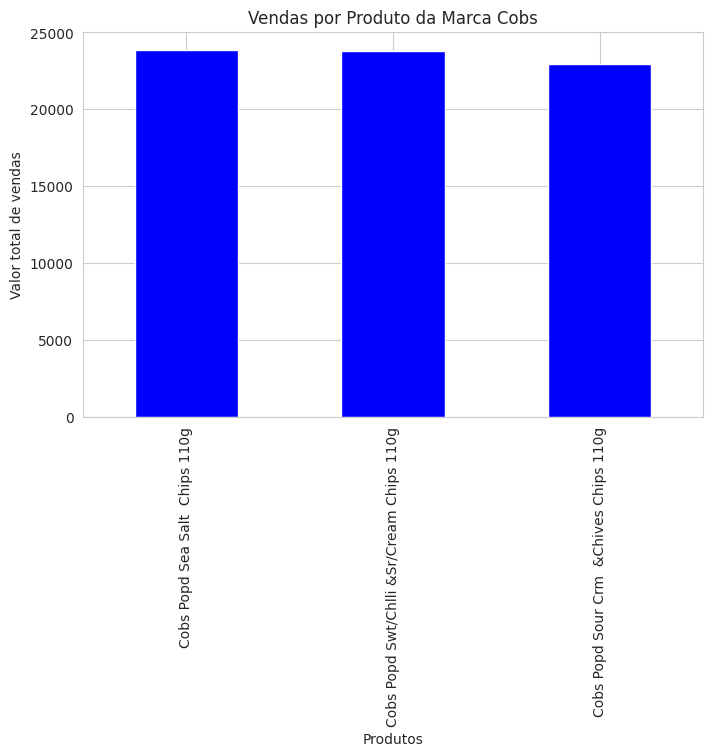

In [86]:
# Visualizando a distribuição das vendas por marcar
plt.figure(figsize=(8,5))
vendas_Cobs.plot(kind= "bar", color = 'blue')
plt.xlabel("Produtos")
plt.ylabel("Valor total de vendas")
plt.title("Vendas por Produto da Marca Cobs")
plt.show()

In [77]:
#agora vamos pegar a marca Cobs Popd para vermos os quantidade de vendas por produto
qtd_vendas_Cobs = marca_Cobs_Popd.groupby('PROD_NAME')["PROD_QTY"].sum().sort_values(ascending=False)
marca_Cobs_Popd.groupby('PROD_NAME')["PROD_QTY"].sum().sort_values(ascending=False)

PROD_NAME
Cobs Popd Sea Salt  Chips 110g              6277
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    6256
Cobs Popd Sour Crm  &Chives Chips 110g      6038
Name: PROD_QTY, dtype: int64

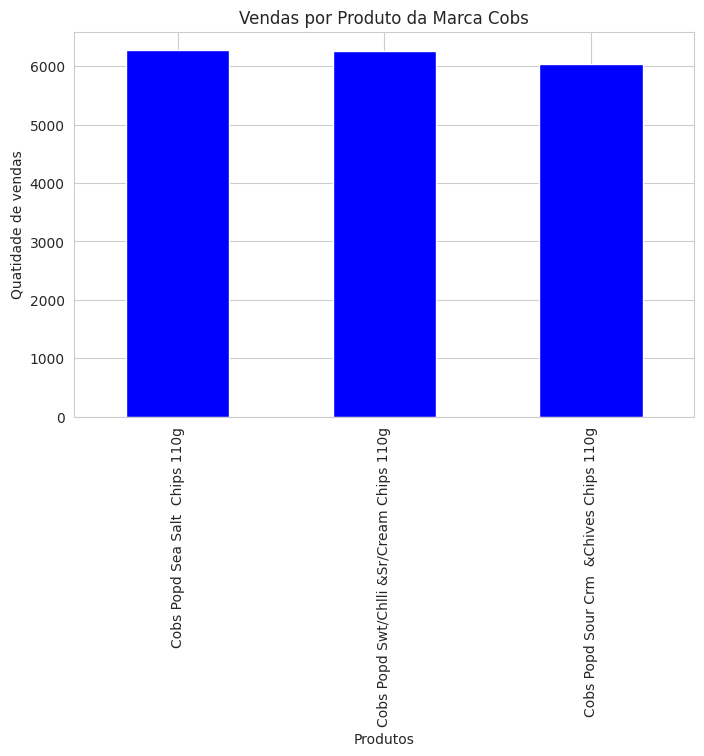

In [85]:
# Visualizando a distribuição das vendas por marcar
plt.figure(figsize=(8,5))
qtd_vendas_Cobs.plot(kind= "bar", color = 'blue')
plt.xlabel("Produtos")
plt.ylabel("Quatidade de vendas")
plt.title("Vendas por Produto da Marca Cobs")
plt.show()

In [80]:
#agora vamos pegar a marca Cobs Popd para vermos os totais de vendas por produto
marca_WW = df[df['Marca']=='WW']
vendas_WW = marca_WW.groupby('PROD_NAME')["TOT_SALES"].sum().sort_values(ascending=False)
marca_WW.groupby('PROD_NAME')["TOT_SALES"].sum().sort_values(ascending=False)

PROD_NAME
WW Supreme Cheese   Corn Chips 200g       5390.3
WW Original Corn    Chips 200g            5367.5
WW Original Stacked Chips 160g            5323.8
WW Sour Cream &OnionStacked Chips 160g    5323.8
WW D/Style Chip     Sea Salt 200g         5249.7
Name: TOT_SALES, dtype: float64

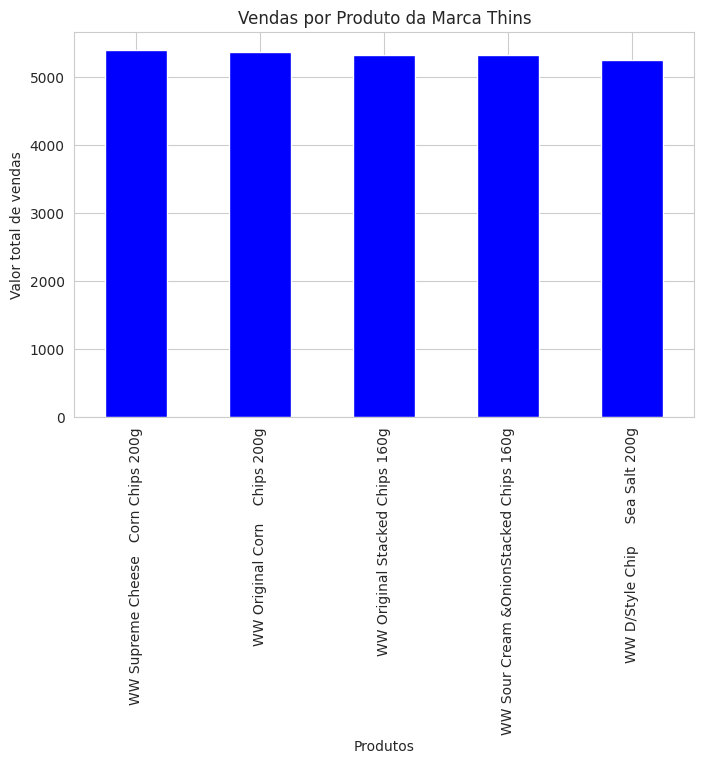

In [81]:
# Visualizando a distribuição das vendas por marcar
plt.figure(figsize=(8,5))
vendas_WW.plot(kind= "bar", color = 'blue')
plt.xlabel("Produtos")
plt.ylabel("Valor total de vendas")
plt.title("Vendas por Produto da Marca WW")
plt.show()

In [83]:
#agora vamos pegar a marca WW para vermos os quantidade de vendas por produto
qtd_vendas_WW = marca_WW.groupby('PROD_NAME')["PROD_QTY"].sum().sort_values(ascending=False)
marca_WW.groupby('PROD_NAME')["PROD_QTY"].sum().sort_values(ascending=False)

PROD_NAME
WW Supreme Cheese   Corn Chips 200g       2837
WW Original Corn    Chips 200g            2825
WW Original Stacked Chips 160g            2802
WW Sour Cream &OnionStacked Chips 160g    2802
WW D/Style Chip     Sea Salt 200g         2763
Name: PROD_QTY, dtype: int64

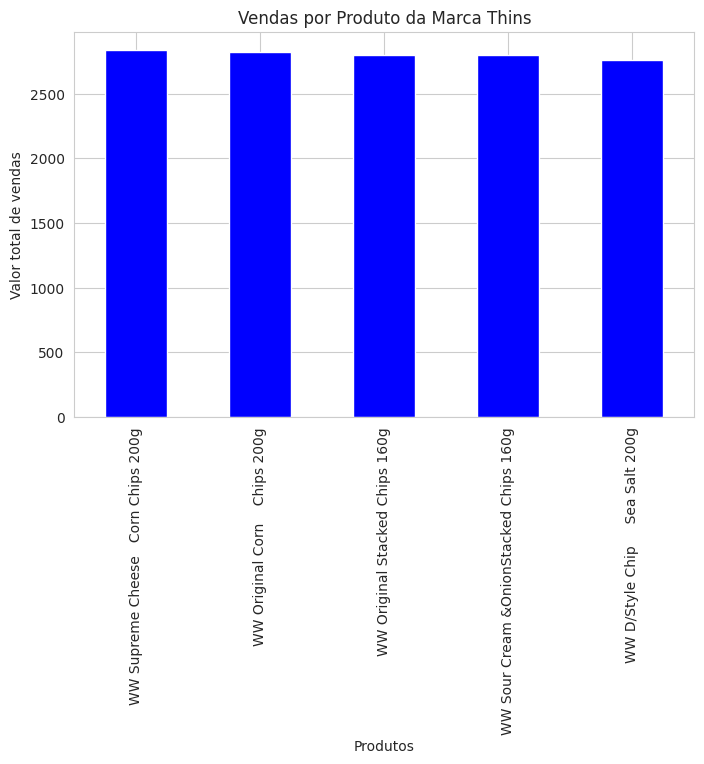

In [84]:
# Visualizando a distribuição das vendas por marcar
plt.figure(figsize=(8,5))
qtd_vendas_WW.plot(kind= "bar", color = 'blue')
plt.xlabel("Produtos")
plt.ylabel("Quantidade de vendas")
plt.title("Vendas por Produto da Marca WW")
plt.show()

In [90]:
# Extraindo o tamanho do produto da coluna 'PROD_NAME' e criando a coluna 'PROD_SIZE'
df['PROD_SIZE'] = df['PROD_NAME'].str.extract('([0-9]+)g')

# Convertendo a nova coluna 'PROD_SIZE' para numérico
df['PROD_SIZE'] = pd.to_numeric(df['PROD_SIZE'])



2.   Examinado os dados do cliente – verificando se há problemas semelhantes nos dados do cliente, procurando nulos.



In [34]:
# Verificando se há valores nulos e ausentes, nas tabelas depois de mescla-las
df.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
Marca               0
PROD_SIZE           0
dtype: int64

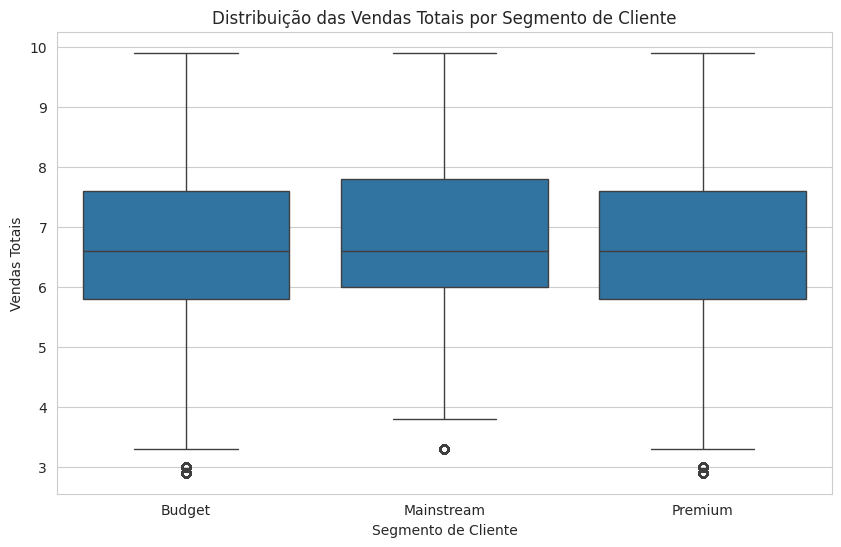

In [35]:
# Removendo outliers da coluna 'TOT_SALES' para cada segmento de cliente
df_sem_outliers_premium = df.groupby('PREMIUM_CUSTOMER').apply(lambda x: x[(x['TOT_SALES'] >= (x['TOT_SALES'].quantile(0.25) - 1.5 * (x['TOT_SALES'].quantile(0.75) - x['TOT_SALES'].quantile(0.25)))) & (x['TOT_SALES'] <= (x['TOT_SALES'].quantile(0.75) + 1.5 * (x['TOT_SALES'].quantile(0.75) - x['TOT_SALES'].quantile(0.25))))])

# Resetando o índice
df_sem_outliers_premium.reset_index(drop=True, inplace=True)

# Visualizando a distribuição das vendas totais por segmento de cliente
plt.figure(figsize=(10, 6))
sns.boxplot(x='PREMIUM_CUSTOMER', y='TOT_SALES', data=df_sem_outliers_premium)
plt.title('Distribuição das Vendas Totais por Segmento de Cliente')
plt.xlabel('Segmento de Cliente')
plt.ylabel('Vendas Totais')
plt.show()
#com esse grafico podemos ver que o tipo do cliente não interfere no total de vendas




3.   Análisando os dados e segmentos de clientes – Certificando de definir as métricas – observevando as vendas totais, os impulsionadores das vendas, de onde vêm as vendas mais altas, etc. Explorando os dados, criando tabelas e gráficos, além de observar tendências e /ou insights que encontrados.

• Quem gasta mais em chips (vendas totais), descrevendo os clientes por estágio de vida

•  Quantos clientes existem em cada segmento

•  Quantos chips são comprados por cliente por segmento

•  Qual é o preço médio do chip por segmento de cliente



In [36]:
#Verificando o valor total das vendas por tipo de cliente
df.groupby("PREMIUM_CUSTOMER")["TOT_SALES"].sum().sort_values(ascending=False)

PREMIUM_CUSTOMER
Mainstream    197980.7
Budget        180184.9
Premium       133422.7
Name: TOT_SALES, dtype: float64

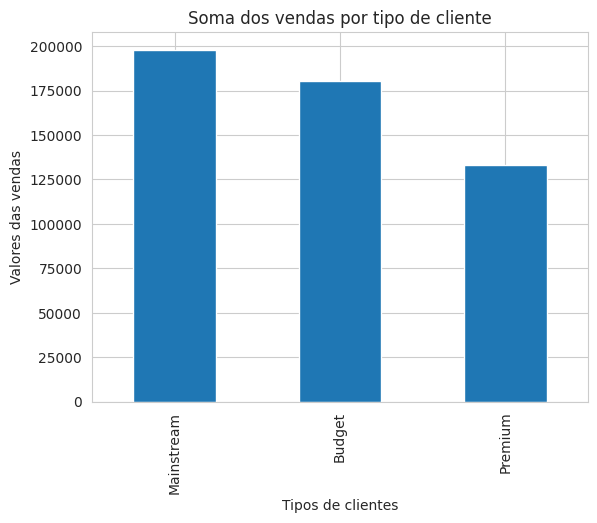

In [37]:
#agrupando valor total de vendas por tipo de cliente
agrupamento_tipo_cliente = df.groupby("PREMIUM_CUSTOMER")["TOT_SALES"].sum().sort_values(ascending=False)

# Plotar o gráfico de barras
agrupamento_tipo_cliente.plot(kind='bar')
plt.xlabel('Tipos de clientes')
plt.ylabel('Valores das vendas')
plt.title('Soma dos vendas por tipo de cliente')
plt.show()

In [38]:
#Qual é o preço médio do chip por segmento de cliente
df.groupby("PREMIUM_CUSTOMER")["TOT_SALES"].mean().sort_values(ascending=False)

PREMIUM_CUSTOMER
Mainstream    6.937198
Budget        6.814087
Premium       6.811451
Name: TOT_SALES, dtype: float64

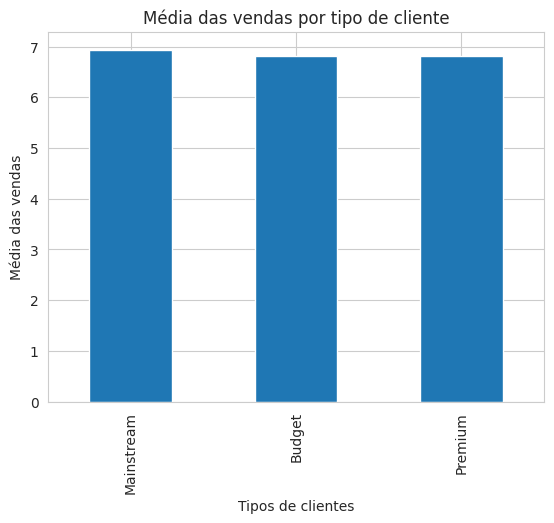

In [39]:
#agrupando por preço medio de compra por tipo de cliente
agrupamento_preco_medio_tipo_cliente = df.groupby("PREMIUM_CUSTOMER")["TOT_SALES"].mean().sort_values(ascending=False)

# Plotar o gráfico de barras
agrupamento_preco_medio_tipo_cliente.plot(kind='bar')
plt.xlabel('Tipos de clientes')
plt.ylabel('Média das vendas')
plt.title('Média das vendas por tipo de cliente')
plt.show()

In [40]:
# Quantos clientes existem em cada segmento
df.groupby("PREMIUM_CUSTOMER")["LYLTY_CARD_NBR"].count().sort_values(ascending=False)

PREMIUM_CUSTOMER
Mainstream    28539
Budget        26443
Premium       19588
Name: LYLTY_CARD_NBR, dtype: int64

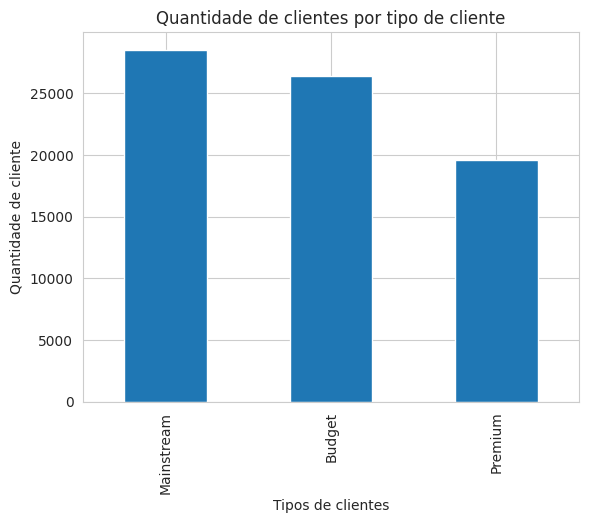

In [41]:
#agrupando por preço medio de compra por tipo de cliente
agrupamento_quantidade_cliente_tipo_cliente = df.groupby("PREMIUM_CUSTOMER")["LYLTY_CARD_NBR"].count().sort_values(ascending=False)

# Plotar o gráfico de barras
agrupamento_quantidade_cliente_tipo_cliente.plot(kind='bar')
plt.xlabel('Tipos de clientes')
plt.ylabel('Quantidade de cliente')
plt.title('Quantidade de clientes por tipo de cliente')
plt.show()

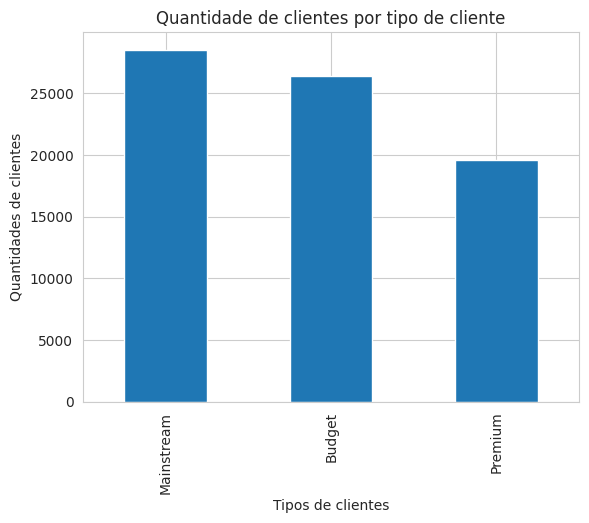

In [42]:
#agrupando de clientes por tipo de cliente
quantidade_clientes_tipo_cliente = df.groupby("PREMIUM_CUSTOMER")["LYLTY_CARD_NBR"].count().sort_values(ascending=False)

# Plotar o gráfico de barras
quantidade_clientes_tipo_cliente.plot(kind='bar')
plt.xlabel('Tipos de clientes')
plt.ylabel('Quantidades de clientes')
plt.title('Quantidade de clientes por tipo de cliente')
plt.show()

In [45]:
#Quantos chips são comprados por cliente por segmento
df.groupby("PREMIUM_CUSTOMER")["PROD_QTY"].sum().sort_values(ascending=False)

PREMIUM_CUSTOMER
Mainstream    54287
Budget        50386
Premium       37328
Name: PROD_QTY, dtype: int64

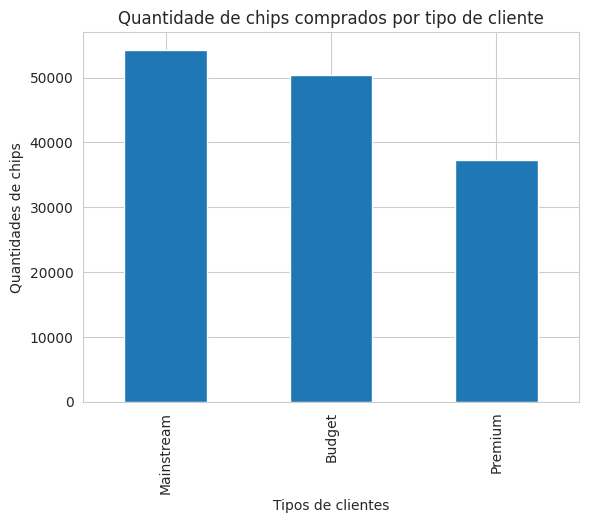

In [46]:
#agrupando quantos chips são comprados por cliente por segmento
agrupamento_quantas_chips_comprados_tipo_cliente = df.groupby("PREMIUM_CUSTOMER")["PROD_QTY"].sum().sort_values(ascending=False)

# Plotar o gráfico de barras
agrupamento_quantas_chips_comprados_tipo_cliente.plot(kind='bar')
plt.xlabel('Tipos de clientes')
plt.ylabel('Quantidades de chips')
plt.title('Quantidade de chips comprados por tipo de cliente')
plt.show()

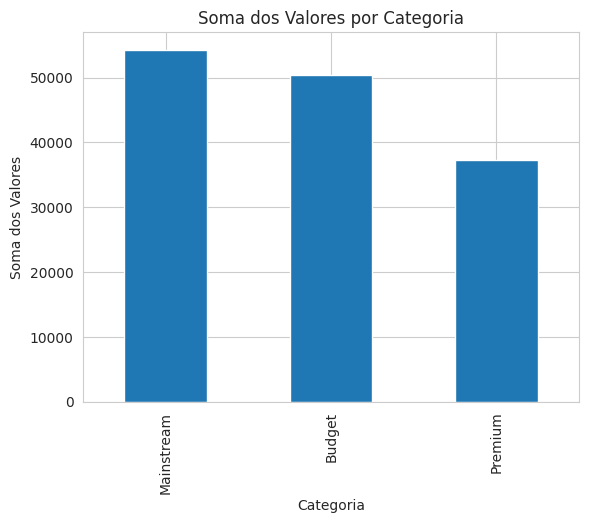

In [47]:
grouped = df.groupby("PREMIUM_CUSTOMER")["PROD_QTY"].sum().sort_values(ascending=False)

# Plotar o gráfico de barras
grouped.plot(kind='bar')
plt.xlabel('Categoria')
plt.ylabel('Soma dos Valores')
plt.title('Soma dos Valores por Categoria')
plt.show()

In [48]:
#Total de vendas realizadas por estilo de vida dos clientes
df.groupby("LIFESTAGE")["TOT_SALES"].sum().sort_values(ascending=False)

LIFESTAGE
OLDER SINGLES/COUPLES     105931.2
RETIREES                   95448.3
OLDER FAMILIES             94413.8
YOUNG FAMILIES             85164.7
YOUNG SINGLES/COUPLES      68446.4
MIDAGE SINGLES/COUPLES     49138.1
NEW FAMILIES               13045.8
Name: TOT_SALES, dtype: float64

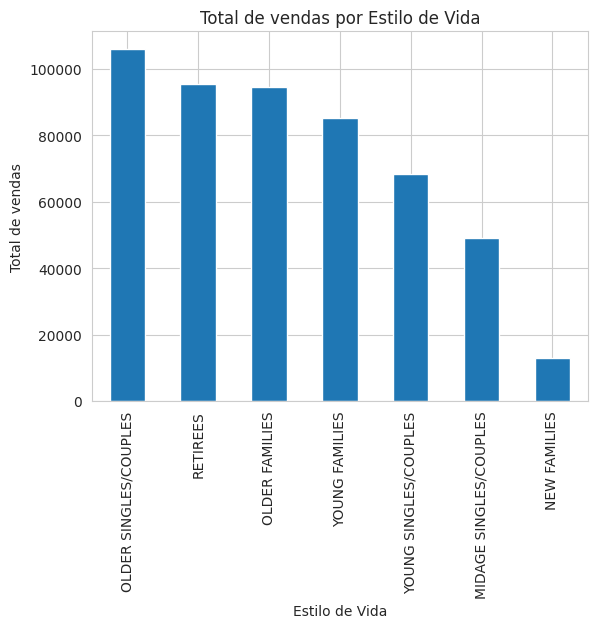

In [49]:
total_valores_estilo_vida = df.groupby("LIFESTAGE")["TOT_SALES"].sum().sort_values(ascending=False)

# Plotar o gráfico de barras
total_valores_estilo_vida.plot(kind='bar')
plt.xlabel('Estilo de Vida')
plt.ylabel('Total de vendas')
plt.title('Total de vendas por Estilo de Vida')
plt.show()

In [50]:
#Quantidade de vendas realizadas por estilo de vida
df.groupby("LIFESTAGE")["PROD_QTY"].sum().sort_values(ascending=False)

LIFESTAGE
OLDER SINGLES/COUPLES     29252
OLDER FAMILIES            26823
RETIREES                  26120
YOUNG FAMILIES            24065
YOUNG SINGLES/COUPLES     18669
MIDAGE SINGLES/COUPLES    13515
NEW FAMILIES               3557
Name: PROD_QTY, dtype: int64

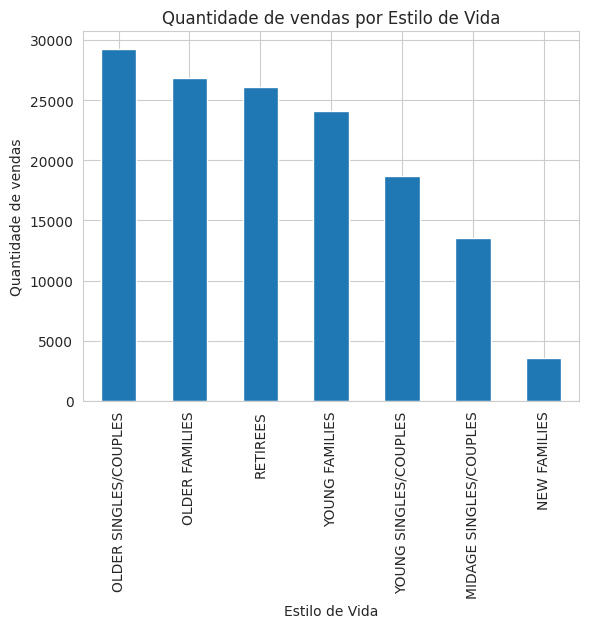

In [51]:
quantidade_vendas_estilo_vida = df.groupby("LIFESTAGE")["PROD_QTY"].sum().sort_values(ascending=False)

# Plotar o gráfico de barras
quantidade_vendas_estilo_vida.plot(kind='bar')
plt.xlabel('Estilo de Vida')
plt.ylabel('Quantidade de vendas')
plt.title('Quantidade de vendas por Estilo de Vida')
plt.show()

In [52]:
#quantidades de clientes por estilo de vida
df.groupby("LIFESTAGE")["LYLTY_CARD_NBR"].count().sort_values(ascending=False)

LIFESTAGE
OLDER SINGLES/COUPLES     15304
RETIREES                  13835
OLDER FAMILIES            13782
YOUNG FAMILIES            12420
YOUNG SINGLES/COUPLES     10201
MIDAGE SINGLES/COUPLES     7104
NEW FAMILIES               1924
Name: LYLTY_CARD_NBR, dtype: int64

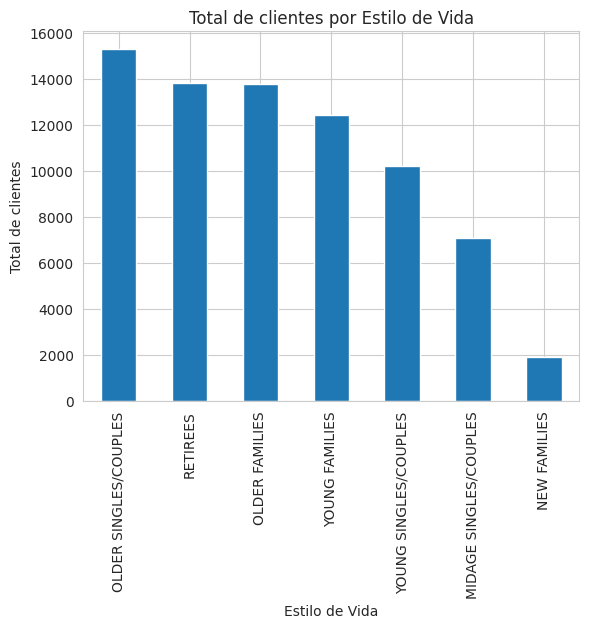

In [53]:
quantidade_clientes_estilo_vida = df.groupby("LIFESTAGE")["LYLTY_CARD_NBR"].count().sort_values(ascending=False)

# Plotar o gráfico de barras
quantidade_clientes_estilo_vida.plot(kind='bar')
plt.xlabel('Estilo de Vida')
plt.ylabel('Total de clientes')
plt.title('Total de clientes por Estilo de Vida')
plt.show()

In [54]:
#Total de vendas por tamanho de pacotes
df.groupby("PROD_SIZE")["TOT_SALES"].sum().sort_values(ascending=False)

PROD_SIZE
175    183172.3
170    112396.4
110     70569.8
150     47622.9
380     36367.6
330     34804.2
200     16007.5
160     10647.6
Name: TOT_SALES, dtype: float64

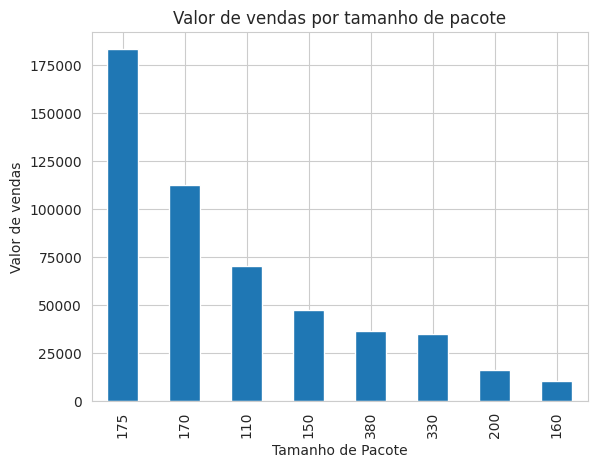

In [55]:
valor_vendas_tamanho_pacote = df.groupby("PROD_SIZE")["TOT_SALES"].sum().sort_values(ascending=False)

# Plotar o gráfico de barras
valor_vendas_tamanho_pacote.plot(kind='bar')
plt.xlabel('Tamanho de Pacote')
plt.ylabel('Valor de vendas')
plt.title('Valor de vendas por tamanho de pacote')
plt.show()

In [56]:
#contando quantos batachips foram vendidos por tamanho da embalagem
df.groupby("PROD_SIZE")["PROD_QTY"].count().sort_values(ascending=False)

PROD_SIZE
175    29215
170    15413
110     9693
150     6376
200     4473
380     3233
330     3197
160     2970
Name: PROD_QTY, dtype: int64

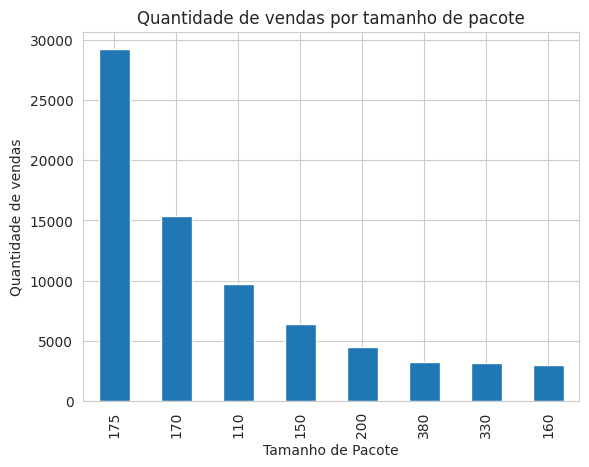

In [57]:
quantidade_vendas_tamanho_pacote = df.groupby("PROD_SIZE")["PROD_QTY"].count().sort_values(ascending=False)

# Plotar o gráfico de barras
quantidade_vendas_tamanho_pacote.plot(kind='bar')
plt.xlabel('Tamanho de Pacote')
plt.ylabel('Quantidade de vendas')
plt.title('Quantidade de vendas por tamanho de pacote')
plt.show()

In [58]:
29215+15413+9693+6376+4473+3233+3197+2970

74570

In [59]:
df.groupby(["PROD_SIZE","LIFESTAGE"])["PROD_SIZE"].count().sort_values(ascending=False)

PROD_SIZE  LIFESTAGE             
175        OLDER SINGLES/COUPLES     5988
           OLDER FAMILIES            5495
           RETIREES                  5408
           YOUNG FAMILIES            4949
           YOUNG SINGLES/COUPLES     3915
170        OLDER SINGLES/COUPLES     3138
           RETIREES                  2853
           OLDER FAMILIES            2849
175        MIDAGE SINGLES/COUPLES    2729
170        YOUNG FAMILIES            2610
           YOUNG SINGLES/COUPLES     2128
110        OLDER SINGLES/COUPLES     2036
           RETIREES                  1884
           OLDER FAMILIES            1624
           YOUNG FAMILIES            1504
170        MIDAGE SINGLES/COUPLES    1452
110        YOUNG SINGLES/COUPLES     1396
150        OLDER SINGLES/COUPLES     1359
           RETIREES                  1250
           OLDER FAMILIES            1055
           YOUNG FAMILIES             999
200        OLDER FAMILIES             993
110        MIDAGE SINGLES/COUPLES     961


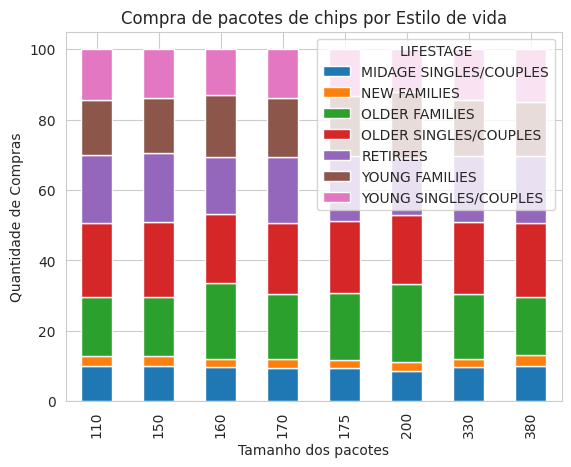

In [60]:
agrupado_por_tamanho_life_estage = df.groupby(["PROD_SIZE","LIFESTAGE"])["PROD_SIZE"].count().sort_values(ascending=False).unstack()

normalized_grouped = agrupado_por_tamanho_life_estage.div(agrupado_por_tamanho_life_estage.sum(axis=1), axis=0) * 100

# Plotar o gráfico de barras
normalized_grouped.plot(kind='bar',stacked=True)
plt.xlabel('Tamanho dos pacotes')
plt.ylabel('Quantidade de Compras')
plt.title('Compra de pacotes de chips por Estilo de vida')
plt.show()

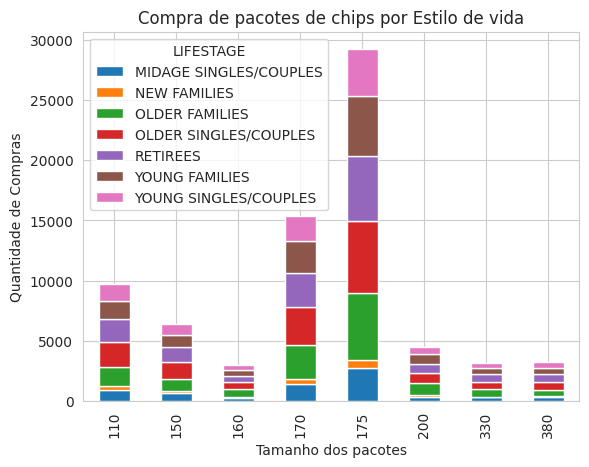

In [61]:
agrupado_por_tamanho_life_estage = df.groupby(["PROD_SIZE","LIFESTAGE"])["PROD_SIZE"].count().sort_values(ascending=False).unstack()


# Plotar o gráfico de barras
agrupado_por_tamanho_life_estage.plot(kind='bar',stacked=True)
plt.xlabel('Tamanho dos pacotes')
plt.ylabel('Quantidade de Compras')
plt.title('Compra de pacotes de chips por Estilo de vida')
plt.show()

In [62]:
df.groupby(["PREMIUM_CUSTOMER","PROD_SIZE"]).size()

PREMIUM_CUSTOMER  PROD_SIZE
Budget            110           3274
                  150           2219
                  160           1122
                  170           5515
                  175          10443
                  200           1664
                  330           1111
                  380           1095
Mainstream        110           3889
                  150           2535
                  160           1016
                  170           5967
                  175          10976
                  200           1554
                  330           1293
                  380           1309
Premium           110           2530
                  150           1622
                  160            832
                  170           3931
                  175           7796
                  200           1255
                  330            793
                  380            829
dtype: int64

In [63]:
#Quantidade de vendas realizadas por pacote de por estilo de vida
df.groupby(["LIFESTAGE","PROD_SIZE"]).size()

LIFESTAGE               PROD_SIZE
MIDAGE SINGLES/COUPLES  110           961
                        150           642
                        160           290
                        170          1452
                        175          2729
                        200           388
                        330           314
                        380           328
NEW FAMILIES            110           288
                        150           183
                        160            67
                        170           383
                        175           731
                        200           106
                        330            72
                        380            94
OLDER FAMILIES          110          1624
                        150          1055
                        160           638
                        170          2849
                        175          5495
                        200           993
                        330           589


In [66]:
df['mes'] = df['DATE'].dt.month

In [67]:
#Quantidade de vendas realizadas por mês
df.groupby("mes")["PROD_QTY"].sum().sort_index(ascending=True)

mes
1     11909
2     10887
3     12222
4     11750
5     11458
6     11979
7     12338
8     11467
9     11674
10    12250
11    11652
12    12415
Name: PROD_QTY, dtype: int64

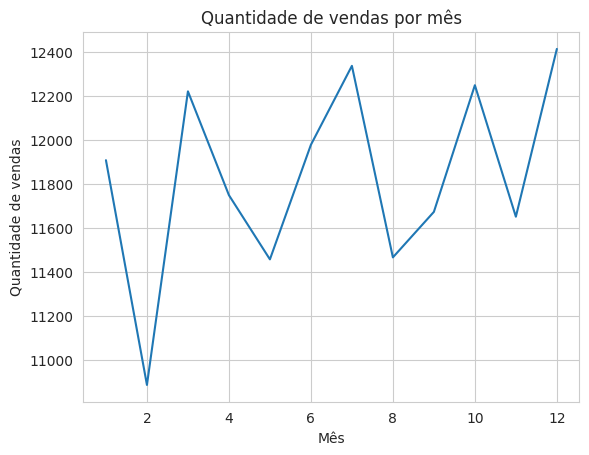

In [68]:
agrupado_mes = df.groupby("mes")["PROD_QTY"].sum().sort_index(ascending=True)

# Plotar o gráfico de linha
agrupado_mes.plot(kind='line')
plt.xlabel('Mês')
plt.ylabel('Quantidade de vendas')
plt.title('Quantidade de vendas por mês')
plt.show()

In [69]:
#Agrupado por mês a quantidade de vendas por estilo de vida
df.groupby(["mes","LIFESTAGE"])["PROD_QTY"].count().sort_index(ascending=True)

mes  LIFESTAGE             
1    MIDAGE SINGLES/COUPLES     605
     NEW FAMILIES               156
     OLDER FAMILIES            1182
     OLDER SINGLES/COUPLES     1203
     RETIREES                  1110
                               ... 
12   OLDER FAMILIES            1171
     OLDER SINGLES/COUPLES     1353
     RETIREES                  1217
     YOUNG FAMILIES            1052
     YOUNG SINGLES/COUPLES      935
Name: PROD_QTY, Length: 84, dtype: int64

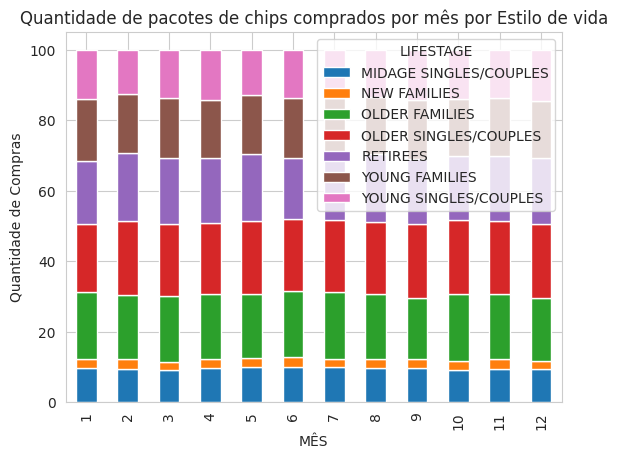

In [70]:
agrupado_quantidade_vendas_mes_life_estage = df.groupby(["mes","LIFESTAGE"])["PROD_QTY"].count().sort_values(ascending=False).unstack()

normalized_quantidade_vendas_mes_life_estage = agrupado_quantidade_vendas_mes_life_estage.div(agrupado_quantidade_vendas_mes_life_estage.sum(axis=1), axis=0) * 100

# Plotar o gráfico de barras
normalized_quantidade_vendas_mes_life_estage.plot(kind='bar',stacked=True)
plt.xlabel('MÊS')
plt.ylabel('Quantidade de Compras')
plt.title('Quantidade de pacotes de chips comprados por mês por Estilo de vida')
plt.show()